# Exercise 19: Principal component methods

This homework assignment is designed to give you an intuition on principal component approaches to understanding high dimensional statistical relationships.

Like earlier homework, you will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading data (1 point)

We are going to look for low dimensional relationships between brain volume measures and working memory capacity.

First, we will need to load the `pls`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [214]:
# WRITE YOUR CODE HERE
require(ggplot2)
install.packages("pls") # Uncomment if not installed
library(pls) # load for the pcr function
library(tidyverse)


The downloaded binary packages are in
	/var/folders/6_/rrkxrwx90sb8r8dskz3syftm0000gp/T//RtmpcWBZK0/downloaded_packages


Use `read.csv` function to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file in the **hcp_data** folder. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only includes the Flanker Task performance (`Flanker_Unadj`) and *all* freesurfer **volume** measures for the right and left hemispheres together. Remove both "na's" and any columns that consist of only zeros.

Hint: Look up using the `ends_with` function to only select variables that end with "_Vol"

Use the `head` function to look at the first few rows of each data frame. 

In [215]:
#setwd("~/Documents/PittCMU/G3/DSPN/DataSciencePsychNeuro/Homeworks/")
# If you're using Colab you might use something like this instead. 
# system("gdown --id 1v9LiVUrt-B__uo_v9JgwClBqyqSjnafS")

d <- read.csv('hcp_data/unrestricted_trimmed_1_7_2020_10_50_44.csv')

d %>%
    select(Flanker_Unadj,ends_with("_Vol")) %>%
    na.omit() -> d1

d1 <- d1[,colSums(d1) != 0]

head(d1)
dim(d1)

,Flanker_Unadj,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,⋯,FS_R_Vessel_Vol,FS_R_ChoroidPlexus_Vol,FS_5thVent_Vol,FS_WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,130.42,1864518,1406924,304488,305634,610122,70240,807245,1239692,269963,⋯,80,1613,0,1269,325,800,409,569,522,813
3,112.56,1512540,1109710,240030,243207,483238,56623,664124,957615,203472,⋯,70,1007,0,1155,195,1029,526,578,576,649
4,121.18,1684117,1280171,260695,265243,525938,63869,726206,1106881,247504,⋯,88,1303,0,1279,302,972,589,528,471,858
5,126.53,1816044,1321362,276506,278002,554508,74869,762308,1155067,254742,⋯,81,909,0,1154,296,1065,618,838,729,1072
6,101.85,1437868,1053766,203718,210539,414257,58813,579632,916973,213012,⋯,75,1215,3,377,235,1057,591,538,430,849
7,107.04,1512727,1126655,242489,248807,491296,62092,665024,984952,205342,⋯,93,1331,17,554,258,1033,494,487,489,992


[1] 1113   53

---
## 2. Correlational structure (4 points)

(a) Take a look at the correlation between all of the freesurfer volume measures ("FS_") using the `cor` function. Create a new variable called `fs_cor` that is the correlation matrix for only the freesurfer volumes

In [216]:
# WRITE YOUR CODE HERE
d1 %>% select(starts_with("FS_")) -> fs_d
fs_cor <- cor(fs_d)

(b) Load (and install locally if needed) the `reshape2` library in order to use the `melt` function on the new `fs_cor` object. Use `head` to show the new, melted `fs_cor` object.

In [217]:
# WRITE YOUR CODE HERE
#install.packages("reshape2")
library(reshape2)
fs_cor <- melt(fs_cor)
head(fs_cor)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,FS_IntraCranial_Vol,FS_IntraCranial_Vol,1.0000000
2,FS_BrainSeg_Vol,FS_IntraCranial_Vol,0.8977578
3,FS_LCort_GM_Vol,FS_IntraCranial_Vol,0.8400174
4,FS_RCort_GM_Vol,FS_IntraCranial_Vol,0.8439151
5,FS_TotCort_GM_Vol,FS_IntraCranial_Vol,0.8452780
6,FS_SubCort_GM_Vol,FS_IntraCranial_Vol,0.7885140


Plot the correlation as a heatmap using `ggplot2`.

Hint: use the `scale_fill_gradient2` function to scale the colors between red and blue, capping the values at -1 and +1.

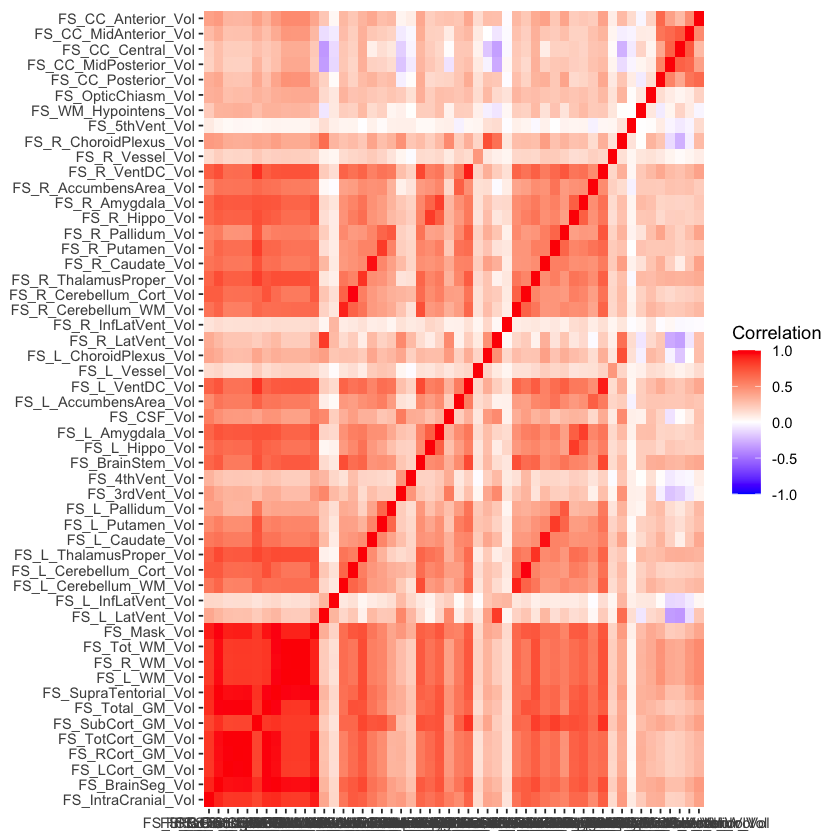

In [218]:
# WRITE YOUR CODE HERE
ggplot(data=fs_cor, aes(x=Var1, y=Var2, fill=value))+geom_tile() +
     scale_fill_gradient2(low = "blue", high = "red", limit = c(-1,1), name="Correlation") +
      theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        panel.background = element_blank())

What patterns do you see in the correlations?

> *Write your response here* 
> * There is block structure in the data that shows strong positive correlations among subsets of the data.

---
## 3. Principal component analysis (3 points)

Let's see how many principal components explain at *at least* 95% of the data.

(a) Create a new object called `fs_d.pca` using the `princomp` function (do not forget to scale the data).


In [219]:
# WRITE YOUR CODE HERE
fs_d.pca <- princomp(fs_d, scale.=TRUE)

Warning message:
“In princomp.default(fs_d, scale. = TRUE) :
 extra argument ‘scale.’ will be disregarded”


(b) Calculate the cumulative variance explained (not unique variance explained as in the tutorial) across the principal components and plot the results using `ggplot`.

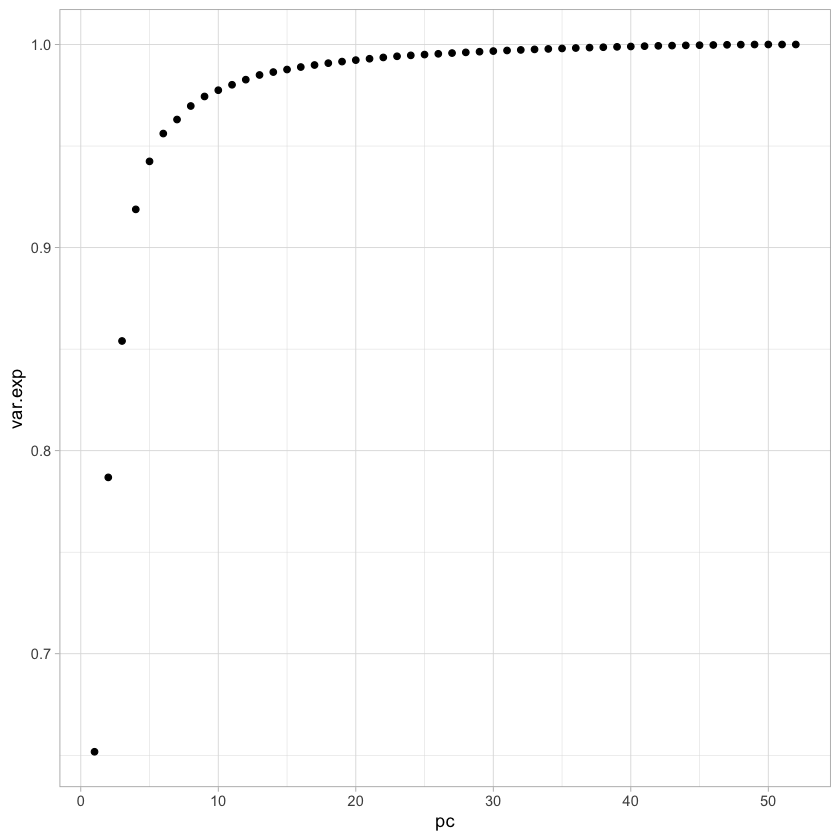

In [220]:
# WRITE YOUR CODE HERE
var.exp = cumsum(fs_d.pca$sdev/sum(fs_d.pca$sdev))
ggplot(data.frame(pc=1:length(var.exp),var.exp), aes(x=pc, y=var.exp)) + geom_point() + theme_light()

(c) Determine exactly how many principal components explain at least 95% of the variance.

Hint: Look up the `which` function. 

In [221]:
# WRITE YOUR CODE HERE
num_pcs = length(which(var.exp<.95))
num_pcs

[1] 5

What does this tell you about the underlying dimensionality of the brain volume measures? 

> *Write your response here*
> Only 5 principal components explain 95% of the variance in brain volumes across participants.

---
## 4. Associating with Flanker task peformance (4 points)

Now apply PCR to the `d1` object you created at the beginning (which includes the Flanker task scores) to find how freesurfer volumes predict Flanker task performance. Set the random seed to "2". Use cross-validation as the validation type and don't forget to scale your data. Show the `summary` of the model fit.

Hint: If you receive an error applying the "scale=TRUE" flag, then you likely still have columns of all zeros somewhere in your data table.

In [222]:
# WRITE YOUR CODE HERE
set.seed(2)
df = data.frame(d1)
pcr.fit = pcr(Flanker_Unadj~., data=df, scale=TRUE, validation="CV")
summary(pcr.fit)

Data: 	X dimension: 1113 52 
	Y dimension: 1113 1
Fit method: svdpc
Number of components considered: 52

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           10.08    9.925    9.924    9.933    9.922    9.924    9.912
adjCV        10.08    9.924    9.923    9.932    9.920    9.922    9.910
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       9.889    9.891    9.893     9.896     9.909     9.918     9.934
adjCV    9.886    9.887    9.890     9.892     9.904     9.913     9.927
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        9.941     9.945     9.934     9.899     9.896     9.907     9.914
adjCV     9.934     9.939     9.928     9.889     9.886     9.897     9.903
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV        9.922     9.930     9.939     9.955     9.968     9.971     9.979
adjCV     9.911  

(b) Use the `validationplot` function to evaluate the bias-variance tradeoff using the cross-validated mean squared-error for each component.

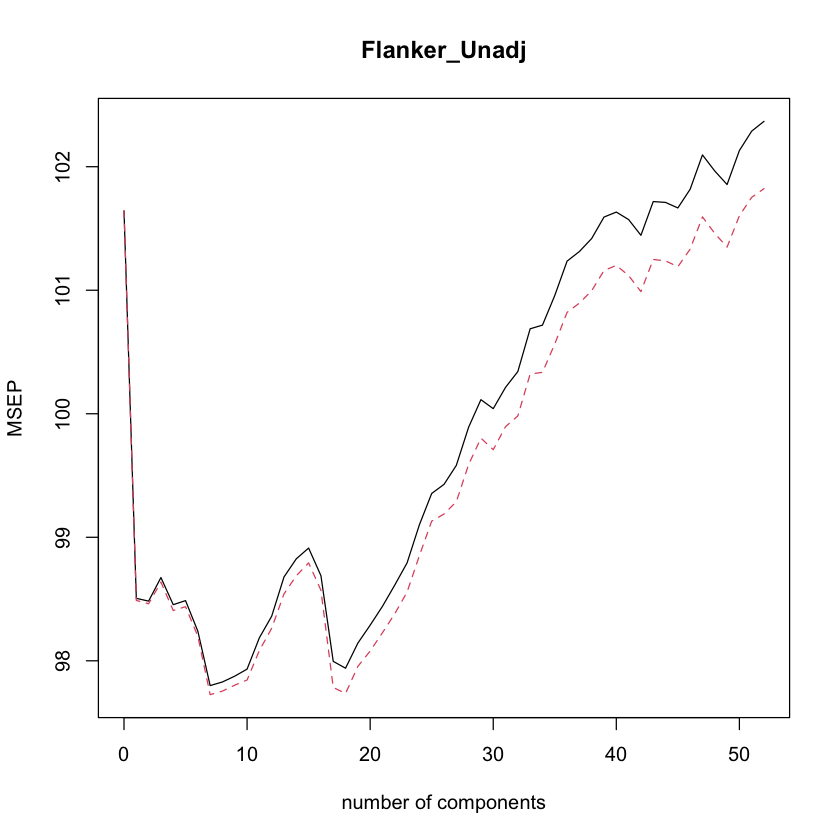

In [223]:
# WRITE YOUR CODE HERE
validationplot(pcr.fit,val.type="MSEP")

(c) Extract the MSEP values of the cross validated fit ("CV" not "adj_CV") from the model object using the `MSEP` funtion. Create a new array of these values. Use the `drop` function to remove the singleton dimension (the original array is 2x1x53 and we want a 2x53 object). Find the minimum value of the first row (the "CV").

In [224]:
pcr.msep = MSEP(pcr.fit)
pcr.msep$val = drop(pcr.msep$val)
which(pcr.msep$val[1,]==min(pcr.msep$val[1,]))


7 comps 
      8

What what does this plot tell you about how many components best explain variance in Flanker task performance? 

> *Write your response here*

> The best model appears to require only the first 8 components to explain variability in the flanker task.

---
## 5. Reflection (2 points)

Compare the number of components that explain variance in X alone (the brain volumes) to the number of components that explain performance in the Flanker task. What does the difference in these two numbers tell you about how variation in brain volumes relates to task performance?

> *Write your response here* 

> While most of the variance in brain volume is explained by the first 5 principal components, some of the weaker components also contribute significantly to explaining variance in Flanker task performance, suggesting that these reflect "weak signal" as opposed to simply noise. 

**DUE:** 5pm EST, April 17, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*